# EDA

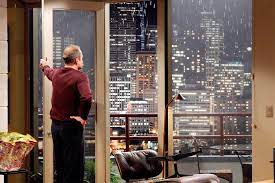

In [438]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [439]:
# importing raw data
housing_df = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [440]:
housing_df.shape # 21 columns, 21597 lines

(21597, 21)

In [441]:
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [442]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [443]:
#create a copy of the dataset
housing_df2 = housing_df.copy()

In [444]:
# rename certain columns so that they have more meaning
housing_df2.rename(columns = {'date' : 'selling_date','price' : 'predicted_price', 'sqft_living15': 'neighbourhood_living_space', 'sqft_lot15' : 'neighbourhood_lot_space'}, inplace = True)

# there are no duplicates!
housing_df2.duplicated().value_counts()

# check for missing values


False    21597
Name: count, dtype: int64

In [445]:
# drop uninteresting columns
housing_df2.drop(['waterfront', 'view', 'bedrooms', 'bathrooms','sqft_above','sqft_basement'], axis = 1, inplace = True)

In [457]:
# look fpr Nans
housing_df2
#housing_df2.isna().sum()


id                                0
selling_date                      0
predicted_price                   0
sqft_living                       0
sqft_lot                          0
floors                            0
condition                         0
grade                             0
yr_built                          0
yr_renovated                   3842
zipcode                           0
lat                               0
long                              0
neighbourhood_living_space        0
neighbourhood_lot_space           0
mean_income                   21519
dtype: int64

In [447]:
#housing_df2.describe(exclude = 'datetime64')

In [448]:
# check data types
housing_df2.dtypes

id                              int64
selling_date                   object
predicted_price               float64
sqft_living                     int64
sqft_lot                        int64
floors                        float64
condition                       int64
grade                           int64
yr_built                        int64
yr_renovated                  float64
zipcode                         int64
lat                           float64
long                          float64
neighbourhood_living_space      int64
neighbourhood_lot_space         int64
dtype: object

In [449]:
# adapt data types
housing_df2['floors'] = housing_df2.floors.astype('int64')
housing_df2['predicted_price'] = housing_df2.predicted_price.astype('int64')
housing_df2['id'] = housing_df2.predicted_price.astype('str')
#housing_df2['zipcode'] = housing_df2.predicted_price.astype('str')
housing_df2['selling_date'] = pd.to_datetime(housing_df2['selling_date'], dayfirst = True)
housing_df2['predicted_price'] = housing_df2.predicted_price.round()
housing_df2.head()

,id,selling_date,predicted_price,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,lat,long,neighbourhood_living_space,neighbourhood_lot_space
0,221900,2014-10-13,221900,1180,5650,1,3,7,1955,0.000,98178,47.511,-122.257,1340,5650
1,538000,2014-12-09,538000,2570,7242,2,3,7,1951,1991.000,98125,47.721,-122.319,1690,7639
2,180000,2015-02-25,180000,770,10000,1,3,6,1933,NaN,98028,47.738,-122.233,2720,8062
3,604000,2014-12-09,604000,1960,5000,1,5,7,1965,0.000,98136,47.521,-122.393,1360,5000
4,510000,2015-02-18,510000,1680,8080,1,3,8,1987,0.000,98074,47.617,-122.045,1800,7503


In [450]:
housing_df2.dtypes

id                                    object
selling_date                  datetime64[ns]
predicted_price                        int64
sqft_living                            int64
sqft_lot                               int64
floors                                 int64
condition                              int64
grade                                  int64
yr_built                               int64
yr_renovated                         float64
zipcode                                int64
lat                                  float64
long                                 float64
neighbourhood_living_space             int64
neighbourhood_lot_space                int64
dtype: object

<Axes: >

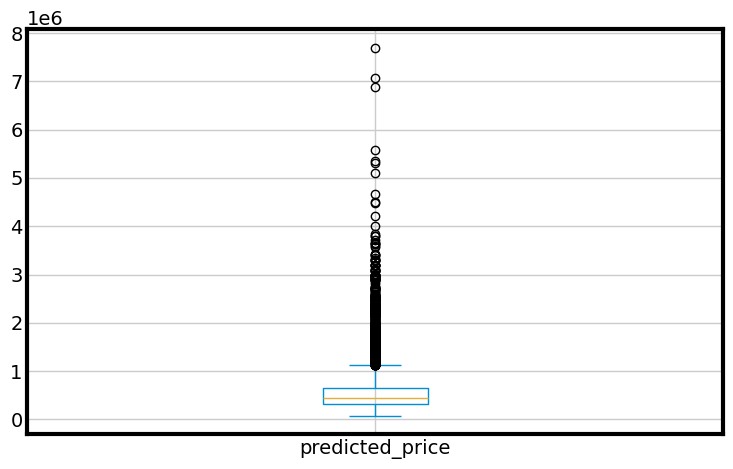

In [451]:
# statistics in boxplots

housing_df2['predicted_price'].plot(kind = 'box')


In [452]:
# how many unique postcodes are there?
housing_df2['zipcode'].nunique()

70

In [453]:
# further insights on the areas
grouped_by_zipcode = housing_df2.groupby('zipcode').count().reset_index()

# areas with most sold houses
areas_with_most_sold_houses = grouped_by_zipcode.sort_values('id', ascending = False).reset_index()
top10_areas_with_most_sold_houses = areas_with_most_sold_houses.loc[0:9,['zipcode','id']]


# areas with least sold houses
areas_with_least_sold_houses = grouped_by_zipcode.sort_values('id').reset_index()
last10_areas_with_least_sold_houses = areas_with_least_sold_houses.loc[0:9,['zipcode','id']]
last10_areas_with_least_sold_houses

top10_areas_with_most_sold_houses

,zipcode,id
0,98103,602
1,98038,589
2,98115,583
3,98052,574
4,98117,553
5,98042,547
6,98034,545
7,98118,507
8,98023,499
9,98006,498


In [454]:
grouped_by_zipcode2 = housing_df2.groupby('zipcode').mean().reset_index()

In [455]:
# import data on mean income vs zip code
income_per_zipcode_df = pd.read_csv('data/King County Income by zip code - Sheet1-4.csv')
income_per_zipcode_df.drop(columns = income_per_zipcode_df.iloc[:,0:3], axis = 1, inplace = True)
income_per_zipcode_df.rename(columns={'mean income': 'mean_income', 'ZIP': 'zip'}, inplace = True)
income_per_zipcode_df['zip'] = income_per_zipcode_df.zip.str.strip('ZIP Code')
income_per_zipcode_df['mean_income'] = income_per_zipcode_df.mean_income.str.strip('$')
income_per_zipcode_df['mean_income'] = income_per_zipcode_df.mean_income.str.replace(',', '')
income_per_zipcode_df.dropna(inplace=True)

# convert data types
income_per_zipcode_df['zip'] = income_per_zipcode_df.zip.astype('int64')
housing_df2['mean_income'] = income_per_zipcode_df.mean_income.astype('int64')
income_per_zipcode_df

,zip,mean_income
0,98002,51430
1,98168,57610
2,98047,59000
3,98003,59070
4,98032,59980
...,...,...
73,98112,332830
74,98033,353420
75,98040,408220
76,98004,411220


In [456]:
# merge income dataframe with main dataframe

grouped_by_zipcode3 = grouped_by_zipcode2.set_index('zipcode').join(income_per_zipcode_df.set_index('zip'))
areas_with_lowest_grade = grouped_by_zipcode3.sort_values('mean_income').reset_index()
areas_with_lowest_grade.loc[0:20, ['zipcode', 'predicted_price', 'sqft_living','floors', 'condition', 'grade', 'neighbourhood_living_space', 'mean_income']]

          

,zipcode,predicted_price,sqft_living,floors,condition,grade,neighbourhood_living_space,mean_income
0,98155,423736.906,1786.614,1.168,3.473,7.170,1716.711,109010
1,98166,464322.390,2067.906,1.205,3.575,7.394,1886.850,113050
2,98126,424734.605,1543.596,1.280,3.466,7.031,1413.034,113580
3,98056,420895.475,2017.096,1.419,3.709,7.355,1906.736,115620
4,98070,489382.017,1893.060,1.333,3.692,7.282,1775.726,116980
5,98038,367091.484,2148.289,1.728,3.194,7.598,2118.946,119240
6,98144,594706.542,1912.111,1.528,3.504,7.455,1757.717,123800
7,98010,423665.990,2137.590,1.400,3.530,7.400,2008.760,124270
8,98011,490377.108,2253.097,1.482,3.221,7.774,2248.077,125370
9,98007,617254.021,2182.057,1.397,3.631,7.965,2124.823,125820
